# This scripts is used to detect the patterns of passers' pre-/post-passing scores

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# This function is used to output errors and slopes of learners' pre-/post-passing scores
# Input: weekly grade and passing week
# output: slope_pre, error_pre, slope_past, error_past, changes of slopes(slope_pre-slope_past)
def grade_pattern_detect(score, week, passing_week):
    index_passing_week = week.index(passing_week)
    score_pre = score[0:index_passing_week+1]
    week_pre = week[0:index_passing_week+1]
    # print week_pre
    score_post = score[index_passing_week:]
    week_post = week[index_passing_week:]
    # print week_post
    # http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
    slope_pre, intercept_pre, r_value_pre, p_value_pre, std_err_pre = stats.linregress(week_pre,score_pre)
    slope_post, intercept_post, r_value_post, p_value_post, std_err_post = stats.linregress(week_post,score_post)
#     fit_pre = np.polyfit(week_pre,score_pre,1)
#     print fit_pre
#     fit_fn_pre = np.poly1d(fit_pre)
#     fit_post = np.polyfit(week_post,score_post,1)
#     print fit_post
#     fit_fn_post = np.poly1d(fit_post)
    a = [slope_pre, intercept_pre, r_value_pre, p_value_pre, std_err_pre]
    b = [slope_post, intercept_post, r_value_post, p_value_post, std_err_post]
    c = [np.mean(score[0:index_passing_week+1]), np.std(score[0:index_passing_week+1]), np.mean(score[index_passing_week+1:]), np.std(score[index_passing_week+1:])]
    return a, b, c #, fit_pre, fit_post

## Demo

In [215]:
Example_dict = {}

# Unstable - Unstable
score = [0.88,0.25,0.92,0.93,0,0.80,0.12,0.82] 
passing_week = 6
Example_dict["U-U"] = {"Score": score, "Pweek": passing_week}

# Unstable - Chasing
score = [0.88,0.25,0.92,0.93,0,0.80,0.98,1]
passing_week = 6
Example_dict["U-C"] = {"Score": score, "Pweek": passing_week}

# # Unstable - Reducing
score = score = [0.88,0.25,0.92,0.93,0,0.80,0.45,0.05]
passing_week = 6
Example_dict["U-R"] = {"Score": score, "Pweek": passing_week}

# # Unstable - Keep high
score = [0.88,0.25,0.92,0.93,0,0.80,0.90,0.84]
passing_week = 6
Example_dict["U-H"] = {"Score": score, "Pweek": passing_week}

# # Unstable - Keep mid
score = [0.88,0.25,0.92,0.93,0,0.80,0.52,0.60]
passing_week = 6
Example_dict["U-M"] = {"Score": score, "Pweek": passing_week}

# # Unstable - Keep low
score = [0.88,0.25,0.92,0.93,0,0.80,0,0.10]
passing_week = 6
Example_dict["U-L"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Unstable
score = [0.0,0.4,0.8,0.96,0.96,0.85,0.2,0.86]
passing_week = 6
Example_dict["C-U"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Chasing
score = [0.0,0.4,0.8,0.96,0.96,0.85,0.70,0.96]
passing_week = 6
Example_dict["C-C"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Reducing
score = [0.0,0.4,0.8,0.96,0.96,0.85,0.42,0]
passing_week = 6
Example_dict["C-R"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Keep high
score = [0.0,0.4,0.8,0.96,0.96,0.85,0.95,0.90]
passing_week = 6
Example_dict["C-H"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Keep mid
score = [0.0,0.4,0.8,0.96,0.96,0.85,0.44,0.52]
passing_week = 6
Example_dict["C-M"] = {"Score": score, "Pweek": passing_week}

# # Chasing - Keep low
score = [0.0,0.4,0.8,0.96,0.96,0.85,0,0]
passing_week = 6
Example_dict["C-L"] = {"Score": score, "Pweek": passing_week}

# # Reducing - Unstable
score = [1,0.92,0.78,0.63,0.75,0.2,1,0.2]
passing_week = 6
Example_dict["R-U"] = {"Score": score, "Pweek": passing_week}

# # Reducing - Chasing
score = [1,0.92,0.78,0.63,0.75,0.66,0.83,0.92]
passing_week = 6
Example_dict["R-C"] = {"Score": score, "Pweek": passing_week}

# # Reducing - Reducing
score = [1,0.92,0.78,0.63,0.75,0.66,0.2,0]
passing_week = 6
Example_dict["R-R"] = {"Score": score, "Pweek": passing_week}

# # Reducing - Keep high
score = [1,0.92,0.78,0.63,0.75,0.66,0.92,0.90]
passing_week = 6
Example_dict["R-H"] = {"Score": score, "Pweek": passing_week}

# # Reducing - keep mid
score = [1,0.92,0.78,0.63,0.75,0.66,0.59,0.61]
passing_week = 6
Example_dict["R-M"] = {"Score": score, "Pweek": passing_week}

# # Reducing - Keep low
score = [1,0.92,0.78,0.63,0.75,0.66,0.05,0.1]
passing_week = 6
Example_dict["R-L"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Unstable
score = [1,0.92,0.96,0.99,0.93,0.3,0.96,0.3]
passing_week = 5
Example_dict["H-U"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Chasing
score = [0.86,0.83,0.85,0.82,0.83,0.75,0.90,1]
passing_week = 5
Example_dict["H-C"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Reducing
score = [1,0.92,0.96,0.99,0.93,0.66,0.10,0.12]
passing_week = 5
Example_dict["H-R"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Keep high
score = [1,0.92,0.96,0.99,0.93,0.96,0.91,0.92]
passing_week = 5
Example_dict["H-H"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Keep mid 
score = [1,0.92,0.96,0.99,0.93,0.66,0.62,0.63]
passing_week = 5
Example_dict["H-M"] = {"Score": score, "Pweek": passing_week}

# # Keep high - Keep low
score = [1,0.92,0.96,0.99,0.93,0.06,0.1,0.05]
passing_week = 5
Example_dict["H-L"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Unstable
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.1,0.70]
passing_week = 6
Example_dict["M-U"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Chasing
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.85,0.93]
passing_week = 6
Example_dict["M-C"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Reducing
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.32,0.10]
passing_week = 6
Example_dict["M-R"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Keep high
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.93,0.90]
passing_week = 6
Example_dict["M-H"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Keep mid 
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.62,0.66]
passing_week = 6
Example_dict["M-M"] = {"Score": score, "Pweek": passing_week}

# # Keep mid - Keep low
score = [0.75,0.70,0.79,0.73,0.77,0.72,0.1,0]
passing_week = 6
Example_dict["M-L"] = {"Score": score, "Pweek": passing_week}

week = [1,2,3,4,5,6,7,8]
print Example_dict

{'R-R': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.66, 0.2, 0]}, 'M-L': {'Pweek': 6, 'Score': [0.75, 0.7, 0.79, 0.73, 0.77, 0.72, 0.1, 0]}, 'R-U': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.2, 1, 0.2]}, 'R-C': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.66, 0.83, 0.92]}, 'R-H': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.66, 0.92, 0.9]}, 'R-L': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.66, 0.05, 0.1]}, 'R-M': {'Pweek': 6, 'Score': [1, 0.92, 0.78, 0.63, 0.75, 0.66, 0.59, 0.61]}, 'C-M': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0.44, 0.52]}, 'C-L': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0, 0]}, 'C-H': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0.95, 0.9]}, 'C-C': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0.7, 0.96]}, 'C-U': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0.2, 0.86]}, 'C-R': {'Pweek': 6, 'Score': [0.0, 0.4, 0.8, 0.96, 0.96, 0.85, 0.42, 0]}, 'M-U': {'Pweek': 6, 'Sc

In [216]:
# Specify the order of outputplots
temp_keylist = ["U-U", "U-C", "U-R", "U-H", "U-M", "U-L", 
                "C-U", "C-C", "C-R", "C-H", "C-M", "C-L",
                "R-U", "R-C", "R-R", "R-H", "R-M", "R-L",
                "H-U", "H-C", "H-R", "H-H", "H-M", "H-L",
                "M-U", "M-C", "M-R", "M-H", "M-M", "M-L",]
print temp_keylist

['U-U', 'U-C', 'U-R', 'U-H', 'U-M', 'U-L', 'C-U', 'C-C', 'C-R', 'C-H', 'C-M', 'C-L', 'R-U', 'R-C', 'R-R', 'R-H', 'R-M', 'R-L', 'H-U', 'H-C', 'H-R', 'H-H', 'H-M', 'H-L', 'M-U', 'M-C', 'M-R', 'M-H', 'M-M', 'M-L']


U-U


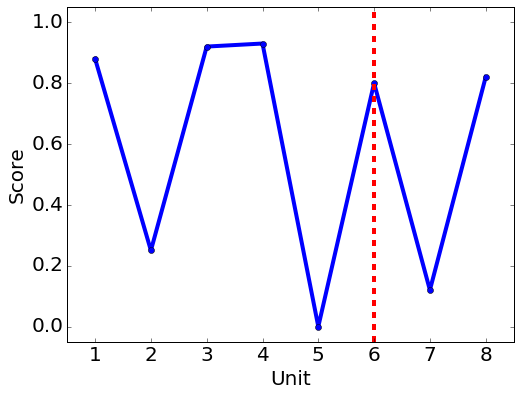

U-C


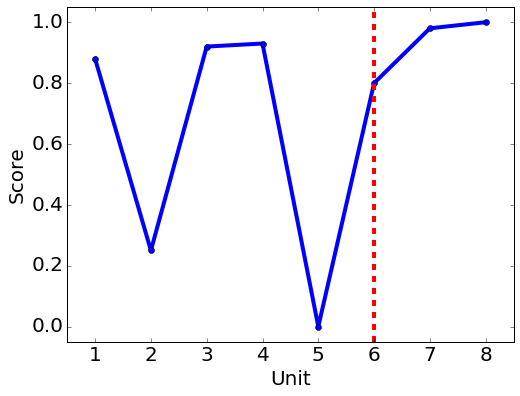

U-R


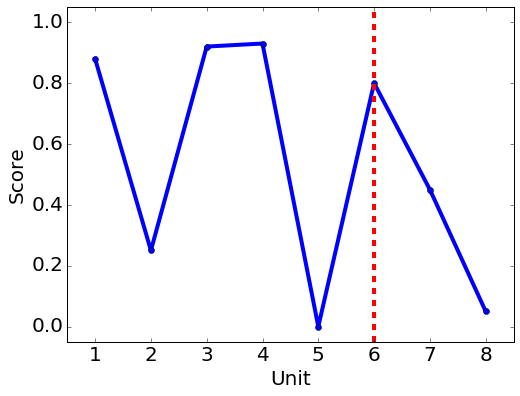

U-H


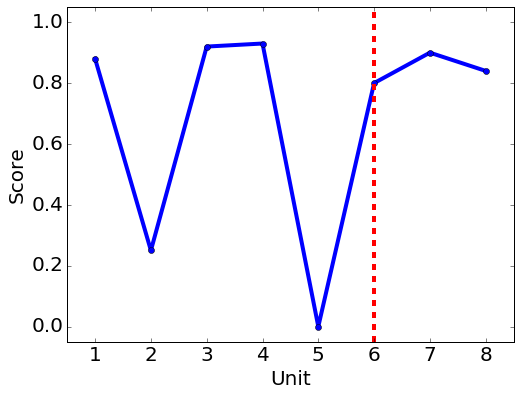

U-M


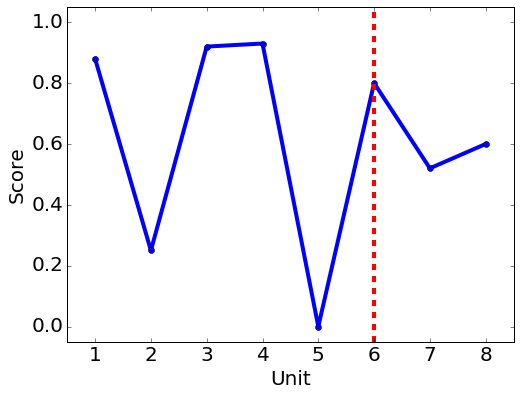

U-L


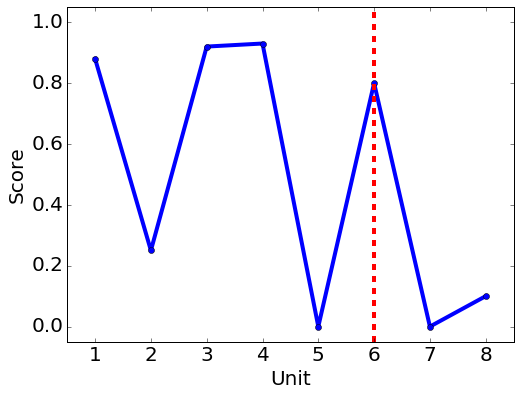

C-U


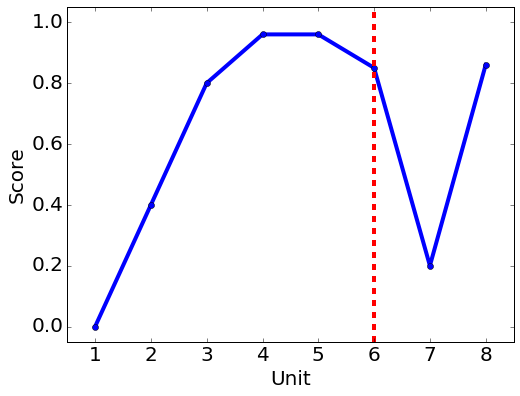

C-C


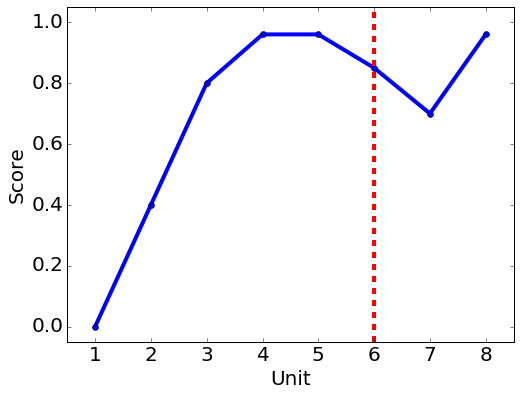

C-R


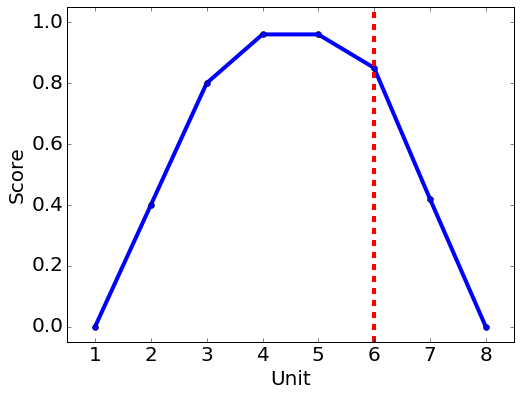

C-H


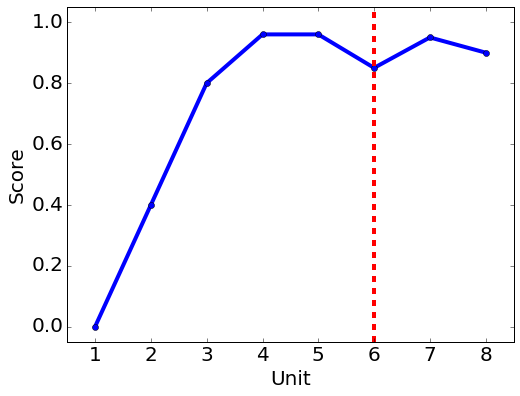

C-M


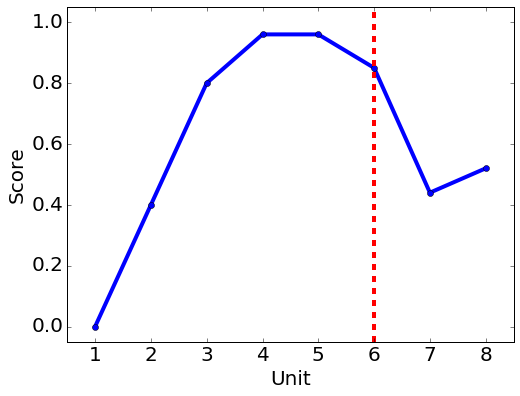

C-L


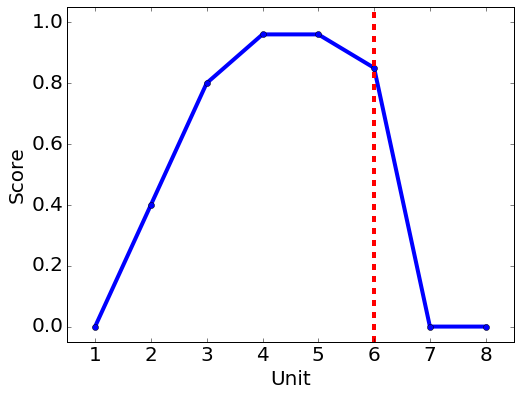

R-U


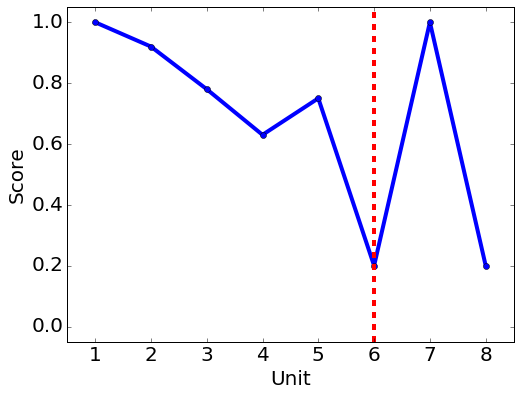

R-C


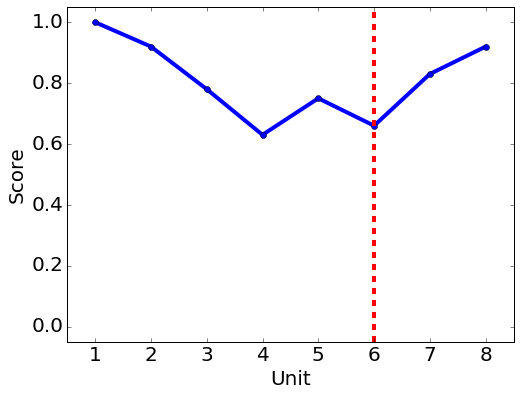

R-R


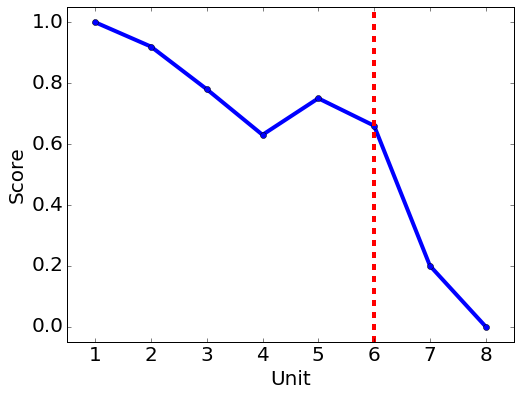

R-H


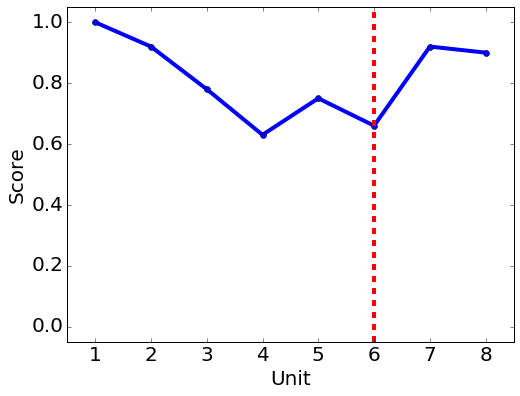

R-M


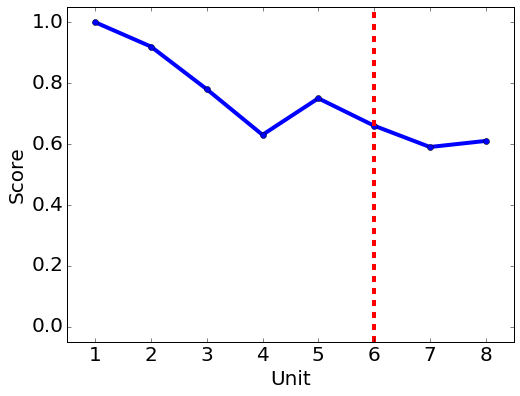

R-L


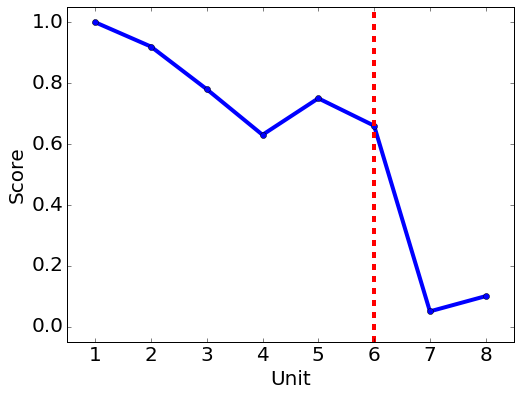

H-U


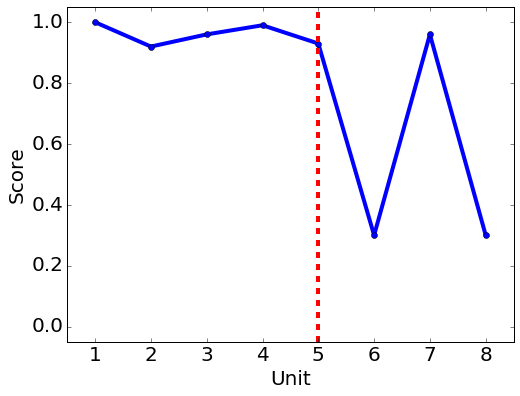

H-C


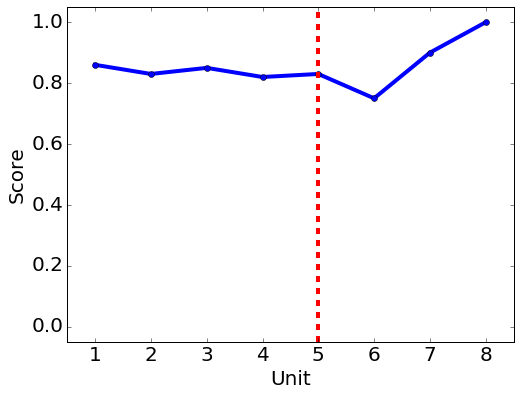

H-R


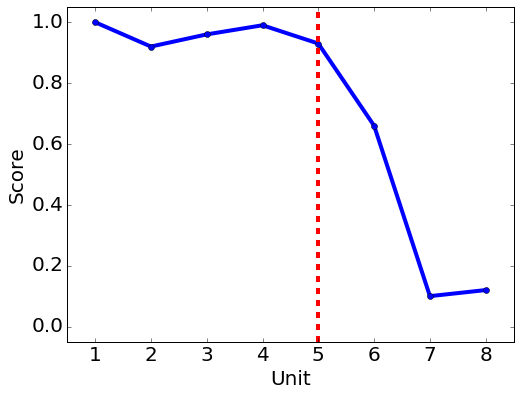

H-H


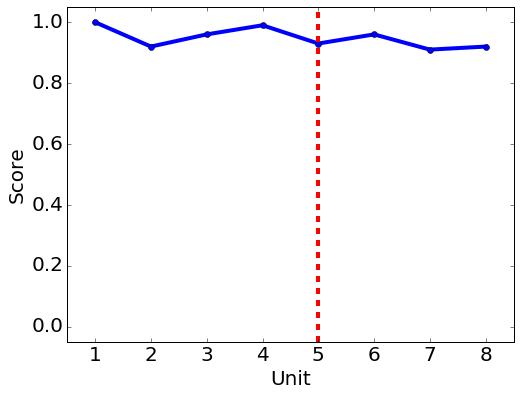

H-M


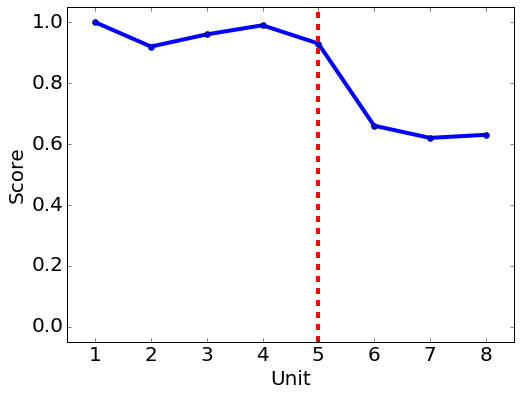

H-L


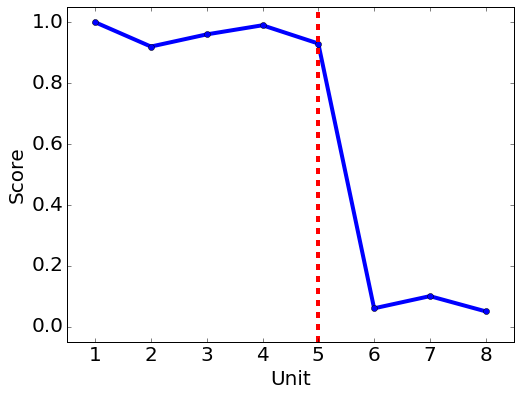

M-U


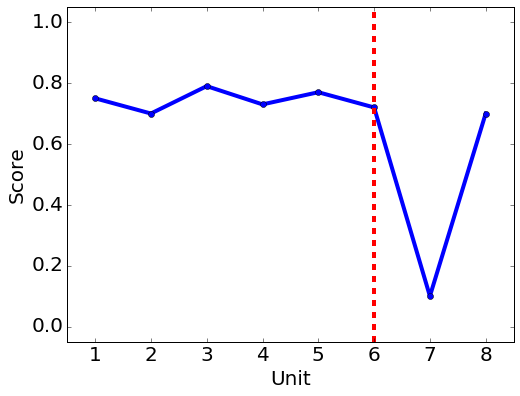

M-C


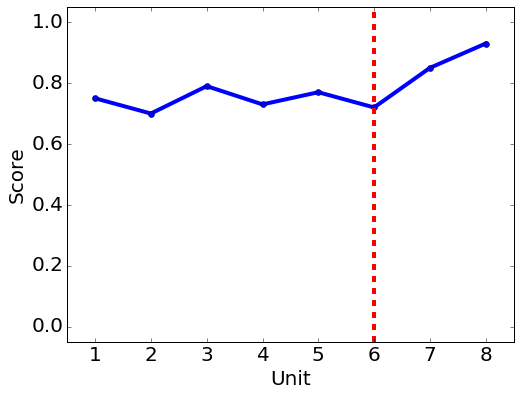

M-R


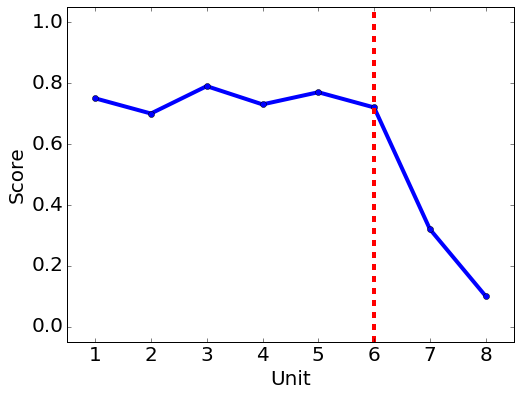

M-H


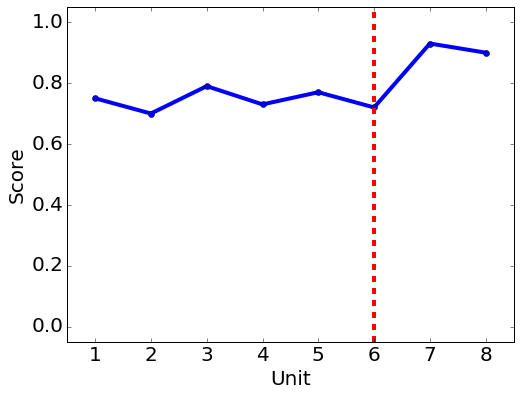

M-M


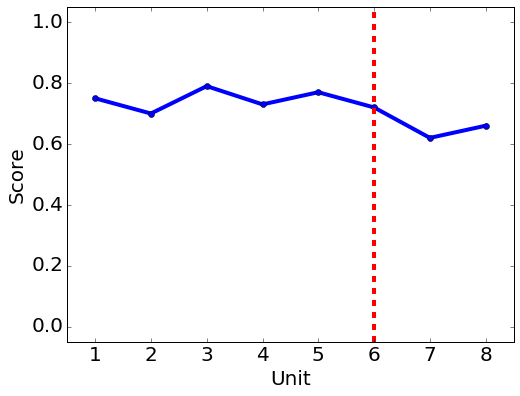

M-L


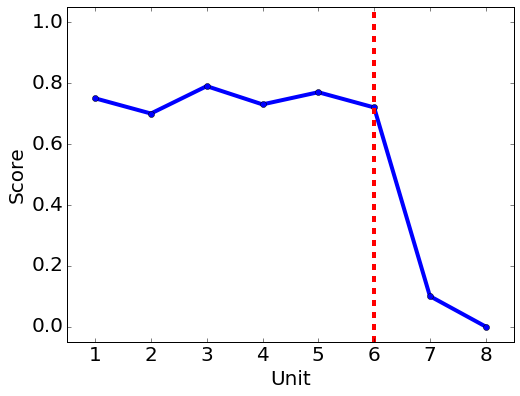

In [224]:
%matplotlib inline

i = 0
j = 0

# Font Size
SIZE = 20
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

for key in temp_keylist:
    print key
    score = Example_dict[key]["Score"]
    passing_week = Example_dict[key]["Pweek"]
    index_passing_week = week.index(passing_week)
    score_pre = score[0:index_passing_week+1]
    week_pre = week[0:index_passing_week+1]
    score_post = score[index_passing_week:]
    week_post = week[index_passing_week:]

    a, b, c = grade_pattern_detect(score, week, passing_week)
    # print a
    # print b
    fit_fn_pre = np.poly1d(a[0:2])
    fit_fn_post = np.poly1d(b[0:2])
    # print a[0]-b[0]
    
#     plt.subplot2grid((5,6), (i/6, j%6))
#     i = i + 1
#     j = j + 1
#     plt.title(key)

    plt.figure(figsize=(640/80, 480/80), dpi=80)
    plt.plot(week, score, color="blue", marker='o', linewidth=4, linestyle="-")
    plt.ylabel('Score')
    plt.xlabel('Unit')

    # plt.plot(week_pre, fit_fn_pre(week_pre), "b-.", linewidth=4)
    # plt.plot(week_post, fit_fn_post(week_post), "b-.", linewidth=4)
    plt.plot([passing_week, passing_week], [-0.05, 1.05], 'r--', linewidth=4)
    plt.xlim(week[0]-0.5, week[-1]+0.5)
    plt.ylim(-0.05, 1.05)
    plt.savefig("Examples/" + key + '.png', dpi=75)
    plt.show()  
    plt.close()

# plt.tight_layout()
# plt.show()  
# plt.close()

## Batch Processing
Given passers' weekly scores (like "FP101x_3T2015_grade_byweek_alt.csv" generated in previous processing) and passers' group (like "FP101x_3T2015_group.csv"), our method can generate a dataframe whose columns are course_learner_id, slope_pre, intercept_pre, std_err_pre, slope_post, intercept_post, std_err_post and slope_changes.

In [1]:
import pandas as pd
from functools import partial

In [2]:
# For each learner, what we need is 
# mean_pre, std_pre, slope_pre, std_err_pre, 
# mean_post, std_post, slope_post, std_err_post 
def grade_pattern_detector(x, weeklist):
    score = [x[i] for i in weeklist]
    # print score
    week = [int(i.split("_")[1]) for i in weeklist]
    # print week
    passing_week = int(x["group"].split("_")[1])
    a, b, c = grade_pattern_detect(score, week, passing_week)
#     print a
#     print b
#     print c
    return c[0], c[1], a[0], a[4], c[2], c[3], b[0], b[4]

In [22]:
# Related files

# # FP101x 3T2015
# score_weekly_file_path = "FP101x_3T2015_grade_byweek_alt.csv"
# group_file_path = "FP101x_3T2015_group.csv"
# group_unit = "Week_6"

# # EX101x 3T2015
# score_weekly_file_path = "EX101x_3T2015_grade_byweek_alt.csv"
# group_file_path = "EX101x_3T2015_group.csv"
# group_unit = "Week_6"

# CTB3365STx 1T2016
score_weekly_file_path = "CTB3365STx_1T2016_grade_byweek_alt.csv"
group_file_path = "CTB3365STx_1T2016_group.csv"
group_unit = "Week_5"

In [23]:
# Read data and calculate their mean, std, slope and std_err
score_weekly = pd.read_csv(score_weekly_file_path)
print score_weekly.columns.values
group = pd.read_csv(group_file_path)
print group.columns.values
df = score_weekly.merge(group, on="course_learner_id")
print df.columns.values
weeklist = list(df.columns.values)
print weeklist
weeklist.remove('course_learner_id')
weeklist.remove('group')
weeklist.sort()
print weeklist

['course_learner_id' 'Week_2' 'Week_3' 'Week_4' 'Week_5' 'Week_6' 'Week_7']
['course_learner_id' 'group']
['course_learner_id' 'Week_2' 'Week_3' 'Week_4' 'Week_5' 'Week_6' 'Week_7'
 'group']
['course_learner_id', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7', 'group']
['Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7']


In [24]:
df['mean_pre'] = float(0)
df['std_pre'] = float(0)
df['slope_pre'] = float(0)
df['std_err_pre'] = float(0)
df['mean_post'] = float(0)
df['std_post'] = float(0)
df['slope_post'] = float(0)
df['std_err_post'] = float(0)

for index, row in df.iterrows():
#     print index
#     print row
    a = grade_pattern_detector(row, weeklist)
    df.set_value(index, 'mean_pre', a[0])
    df.set_value(index, 'std_pre', a[1])
    df.set_value(index, 'slope_pre', a[2])
    df.set_value(index, 'std_err_pre', a[3])
    df.set_value(index, 'mean_post', a[4])
    df.set_value(index, 'std_post', a[5])
    df.set_value(index, 'slope_post', a[6])
    df.set_value(index, 'std_err_post', a[7])
    
print df.head(10)
print min(df['slope_pre'])
print min(df['slope_post'])

                             course_learner_id  Week_2    Week_3    Week_4  \
0  course-v1:DelftX+CTB3365STx+1T2016_10005454  0.9375  1.000000  1.000000   
1  course-v1:DelftX+CTB3365STx+1T2016_10008349  1.0000  1.000000  0.857143   
2  course-v1:DelftX+CTB3365STx+1T2016_10018861  0.8750  0.900000  0.857143   
3  course-v1:DelftX+CTB3365STx+1T2016_10019216  0.8750  0.766667  0.428571   
4  course-v1:DelftX+CTB3365STx+1T2016_10027884  0.7500  0.766667  1.000000   
5  course-v1:DelftX+CTB3365STx+1T2016_10029736  1.0000  1.000000  1.000000   
6  course-v1:DelftX+CTB3365STx+1T2016_10031780  0.3750  1.000000  1.000000   
7  course-v1:DelftX+CTB3365STx+1T2016_10035855  0.3750  0.233333  0.857143   
8  course-v1:DelftX+CTB3365STx+1T2016_10053999  0.8125  0.666667  1.000000   
9  course-v1:DelftX+CTB3365STx+1T2016_10067439  0.8750  0.666667  0.428571   

     Week_5    Week_6    Week_7   group  mean_pre   std_pre  slope_pre  \
0  0.833333  0.433333  0.923077  Week_4  0.979167  0.029463   0.031

In [25]:
# Calculate their pre-passing and post-passing behaviors
# based on values we got in previous steps
df_week = df[df["group"]==group_unit]
print df_week.shape

(110, 16)


In [26]:
# Define a function to determine passers' behavior patterns
def grade_pattern_measure(mean, std, slope, std_err):
    
    std_threshold = 0.1
    mean_high_threshold = 0.8
    mean_mid_threshold = 0.2
    slope_threshold = 0.1
    std_err_threshold = 0.05
    
    if std <= std_threshold:
        if mean >= mean_high_threshold:
            return "Keep_high"
        else:
            if mean >= mean_mid_threshold:
                return "Keep_mid"
            else:
                return "Keep_low"
    else:
        if slope >= slope_threshold:
            return "Chasing"
        elif slope <= -slope_threshold:
            return "Reducing"
        else:
            if std_err >= std_err_threshold:
                return "Unstable"
            else:
                if slope > 0:
                    return "Chasing"
                else:
                    return "Reducing"

In [27]:
df_week["pre_behavior"] = df.apply(lambda x: grade_pattern_measure(x["mean_pre"], x["std_pre"], x["slope_pre"], x["std_err_pre"]), axis=1)
df_week["post_behavior"] = df.apply(lambda x: grade_pattern_measure(x["mean_post"], x["std_post"], x["slope_post"], x["std_err_post"]), axis=1)
outputfile_path = score_weekly_file_path.split("_") [0] + "_" + score_weekly_file_path.split("_") [1] + "_" + group_unit + "_behaviors.csv"
df_week.to_csv(outputfile_path)

/Users/yuezhao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yuezhao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
print df_week.head(10)

                              course_learner_id  Week_2    Week_3    Week_4  \
3   course-v1:DelftX+CTB3365STx+1T2016_10019216  0.8750  0.766667  0.428571   
6   course-v1:DelftX+CTB3365STx+1T2016_10031780  0.3750  1.000000  1.000000   
9   course-v1:DelftX+CTB3365STx+1T2016_10067439  0.8750  0.666667  0.428571   
12  course-v1:DelftX+CTB3365STx+1T2016_10079598  0.1875  1.000000  1.000000   
13   course-v1:DelftX+CTB3365STx+1T2016_1008838  0.8125  0.733333  0.714286   
15  course-v1:DelftX+CTB3365STx+1T2016_10096740  0.9375  0.733333  0.571429   
22  course-v1:DelftX+CTB3365STx+1T2016_10166560  0.9375  0.700000  0.571429   
23  course-v1:DelftX+CTB3365STx+1T2016_10171652  0.7500  0.766667  0.714286   
26  course-v1:DelftX+CTB3365STx+1T2016_10203672  0.9375  0.733333  0.714286   
28  course-v1:DelftX+CTB3365STx+1T2016_10206826  0.8750  0.666667  0.714286   

      Week_5    Week_6    Week_7   group  mean_pre   std_pre  slope_pre  \
3   0.666667  0.488889  0.538462  Week_5  0.684226  0.1

In [29]:
print df_week[["pre_behavior", "post_behavior", "course_learner_id"]].groupby(["pre_behavior", "post_behavior"]).count()

                            course_learner_id
pre_behavior post_behavior                   
Chasing      Keep_high                      3
             Keep_low                       3
             Reducing                       3
Keep_high    Keep_mid                       1
Keep_mid     Keep_high                      3
             Keep_low                       5
             Keep_mid                       5
             Reducing                       2
             Unstable                       3
Reducing     Chasing                        1
             Keep_low                       6
             Keep_mid                       5
             Reducing                       1
             Unstable                       2
Unstable     Keep_high                      8
             Keep_low                      11
             Keep_mid                      24
             Reducing                      14
             Unstable                      10


In [ ]:
print 